# Introduction to ML Concepts

Time to dive into some of the core concepts of machine learning! We'll start with a high-level overview of different types of machine learning, then move on to some common machine learning algorithms.

## 1. Types of Machine Learning
- Supervised Learning: Learning from labeled data
  - Examples: classification, regression
- Unsupervised Learning: Finding patterns in unlabeled data
  - Examples: clustering, dimensionality reduction
- Reinforcement Learning: Learning through interaction with an environment
  - Examples: game playing, robotics


## 2. Common ML Algorithms

### 2.1. Supervised Learning Algorithms

**Supervised learning:** learning a function which approximates the relationship between an input and output from a set of labeled training examples.

E.g.:

![Home price data](img/hp.png)

Our *target* (or dependent variable, or output) is the variable we would like to predict/estimate.

Our *features* (or regressors, or independent variables, or inputs, or covariates) are the variables we can use to make our prediction/estimate.

In this case, $\mathrm{Home \$}\approx f(\mathrm{Sq. ft., \#bed, \#bath,}\ldots)$

##### Regression vs. Classification

Supervised learning can be divided into regression and classification. 
In the case of **regression**, we estimate a *quantity*.

![regression](img/reg.png)

In the case of **classification**, we predict a *label* (i.e. a category).

![classification](img/class.png)

#### Linear Regression

Linear regression assumes that $f$ is just a weighted sum of the variables in the covariate matrix $X$:
$$f(X)=\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \epsilon$$
Which we can express as just $f(X)=X\mathbf{\beta}$ (and so $Y=X\mathbf{\beta}+\epsilon$).
Turns out the best estimate of $\beta$ is just $(X^TX)^{-1}X^TY$. This is called the Ordinary Least Squares (OLS) estimate. However, that expression sometimes cannot be calculated, and is not computationally efficient to use with large data.

In order to apply OLS regression, our problem should obey certain assumptions.
1. The linear model is correct.
2. The error term ε has mean 0.
3. The regressors (the $x$ terms) are linearly independent.
4. The errors are homoscedastic and uncorrelated.
5. The errors are normally distributed.



In [4]:
# Simple linear regression example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate some random data - in a real problem, we would not know the true relationship described here.
X = np.random.uniform(-4, 4, (100, 1))
y = X**2 + np.random.normal(0, 3, X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R-squared score: {model.score(X_test, y_test)}")

R-squared score: -0.013549993782751235


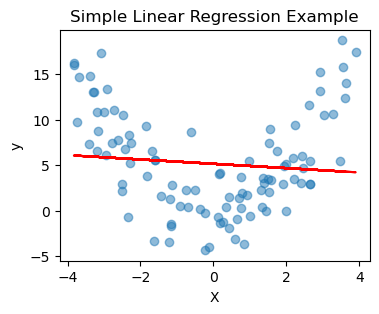

In [5]:
# Plotting the data and the regression line
plt.figure(figsize=(4, 3))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.title('Simple Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Notice a couple of things. One, our fit is abysmal.
Two, there *does* nonetheless seem (visually) to be an interesting relationship between the variables. Maybe $y$ is related not directly to $x$, but to some function of $x$.

In this case, we can get ideas from visualizing the data, but in most cases, a deep understanding of the data will be necessary to make a good model. E.g., suppose in this case we know that $X$ is wind speed, and $y$ is power generated by a wind turbine. An engineer might tell us that in practice $y$ is typically related to the *square* of $X$, rather than $X$ itself. 

R-squared score (X^2 model): 0.6562704572070961


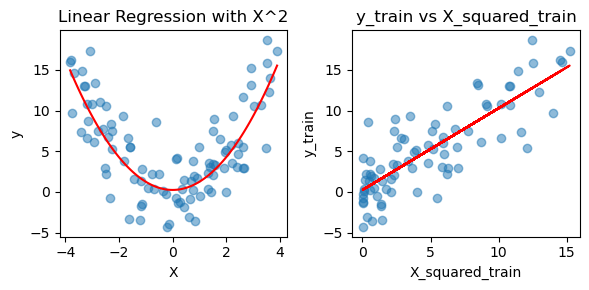

In [6]:
# Fit a linear model where y is regressed on X^2
X_squared_train = X_train**2
X_squared_test = X_test**2

model_squared = LinearRegression()
model_squared.fit(X_squared_train, y_train)

print(f"R-squared score (X^2 model): {model_squared.score(X_squared_test, y_test)}")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plotting the data and the regression curve
axes[0].scatter(X, y, alpha=0.5)
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model_squared.predict(X_curve**2)
axes[0].plot(X_curve, y_pred, color='red')
axes[0].set_title('Linear Regression with X^2')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')

# Plotting y_train vs X_squared_train
axes[1].scatter(X_squared_train, y_train, alpha=0.5)
axes[1].plot(X_squared_train, model_squared.predict(X_squared_train), color='red')
axes[1].set_title('y_train vs X_squared_train')
axes[1].set_xlabel('X_squared_train')
axes[1].set_ylabel('y_train')

plt.tight_layout()
plt.show()

"Linear" regression is surprisingly flexible!
#### Logistic Regression

Despite its name, logistic regression is a powerful algorithm for *classification*. In a binary classification problem, our target can be thought of as being either 1 or 0. It is possible (but not advisable!) to use a regression algorithm, like linear regression, in such a case.

Suppose that I have data where the target is a binary indicator for whether a student passed a certain class. The data is the student's score on a that class's first exam. 

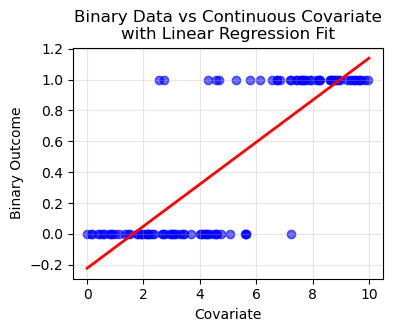

Linear Regression Coefficient: 0.1360
Linear Regression Intercept: -0.2224


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate continuous covariate
n_samples = 100
covariate = np.random.uniform(0, 10, n_samples)

# Generate binary data correlated with covariate
probabilities = 1 / (1 + np.exp(-(covariate - 5)))
binary_data = np.random.binomial(1, probabilities)

# Fit linear regression
model = LinearRegression()
model.fit(covariate.reshape(-1, 1), binary_data)

# Create plot
plt.figure(figsize=(4, 3))
plt.scatter(covariate, binary_data, color='blue', alpha=0.6)

# Plot linear regression line
x_plot = np.linspace(0, 10, 100)
y_plot = model.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='red', lw=2)

plt.xlabel('Covariate')
plt.ylabel('Binary Outcome')
plt.title('Binary Data vs Continuous Covariate\nwith Linear Regression Fit')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Linear Regression Coefficient: {model.coef_[0]:.4f}")
print(f"Linear Regression Intercept: {model.intercept_:.4f}")

The idea of logistic regression is that instead of directly modeling the target, we instead model the *probability* that the target is 1 or 0. This is a specific type of *generalized linear model*, in which the target is transformed by a *link function*. In this case, the link function is the *logit* function, which is the inverse of the *logistic* function. The logistic function is defined as: $$\mathrm{logit}(p)=\log\left(\frac{p}{1-p}\right)$$

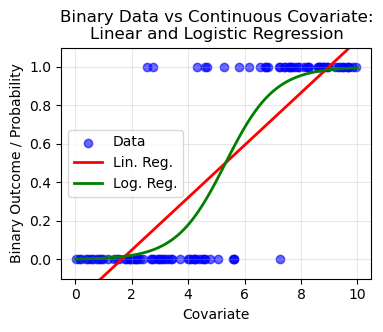

Linear Regression:
Coefficient: 0.1360
Intercept: -0.2224

Logistic Regression:
Coefficient: 1.1452
Intercept: -6.0933


In [8]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(covariate.reshape(-1, 1), binary_data)

# Create plot
plt.figure(figsize=(4, 3))
plt.scatter(covariate, binary_data, color='blue', alpha=0.6, label='Data')

# Plot linear regression line
x_plot = np.linspace(0, 10, 100)
y_linear = model.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_linear, color='red', lw=2, label='Lin. Reg.')

# Plot logistic regression curve
y_logistic = logistic_model.predict_proba(x_plot.reshape(-1, 1))[:, 1]
plt.plot(x_plot, y_logistic, color='green', lw=2, label='Log. Reg.')

plt.xlabel('Covariate')
plt.ylabel('Binary Outcome / Probability')
plt.title('Binary Data vs Continuous Covariate:\nLinear and Logistic Regression')
plt.legend(loc='center left')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)  # Set y-axis limits for better visualization
plt.show()

print("Linear Regression:")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print("\nLogistic Regression:")
print(f"Coefficient: {logistic_model.coef_[0][0]:.4f}")
print(f"Intercept: {logistic_model.intercept_[0]:.4f}")

#### Decision Trees

A totally different approach to modeling data is to use a decision tree. A decision tree is a tree-like model of the dataset. It is a simple model that is easy to interpret and understand. It is also a non-parametric model, which means that it makes no assumptions about the shape of the data - sometimes a big advantage!

In [10]:
# First, let's make some data.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a sample dataset
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'income': np.random.randint(20000, 200000, n_samples),
    'credit_score': np.random.randint(300, 850, n_samples),
    'debt_to_income': np.random.uniform(0, 0.6, n_samples),
    'employment_length': np.random.randint(0, 30, n_samples),
    'loan_amount': np.random.randint(5000, 100000, n_samples)
})

# Create a rule-based target variable
data['loan_approved'] = (
    (data['credit_score'] > 700) & 
    (data['debt_to_income'] < 0.4) & 
    (data['income'] > 50000)
).astype(int)

# Prepare features and target
X = data[['income', 'credit_score', 'debt_to_income', 'employment_length', 'loan_amount']]
y = data['loan_approved']

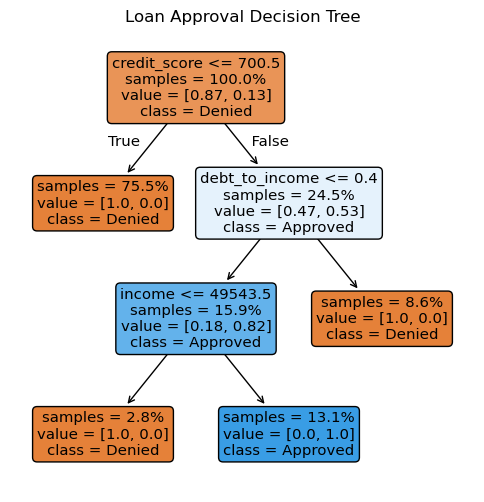

Decision Tree created and visualized based on the loan approval data.


In [11]:
# Create and train the Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(6, 6))
plot_tree(dt, filled=True, feature_names=X.columns.to_list(), class_names=['Denied', 'Approved'], rounded=True, impurity=False, proportion=True, precision=2)
plt.title("Loan Approval Decision Tree")
plt.show()

print("Decision Tree created and visualized based on the loan approval data.")

#### Random Forests

The decision tree is highly interpretable, which is sometimes a big advantage. But, it is a weak machine learning algorithm; not nearly as powerful as some others. One way to make it more powerful is to use a *random forest*. A random forest is an ensemble of decision trees, which means that it is a collection of decision trees that are trained separately and then combined to make a prediction. Essentially, a random forest is a collection of decision trees that are trained separately and then combined (by averaging or voting) to make a prediction. They can be used for both classification and regression tasks.

You lose the interpretability of a single decision tree, but you gain a lot of predictive power. And random forests are very easy to use and very flexible, don't require much tuning, are very hard to overfit, and don't make many assumptions about the data. A good general-purpose algorithm.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Create and train the Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

Random Forests makes it easy to see which features are most important in making a prediction. This is because the algorithm can keep track of how much each feature contributes to the trees in the forest.

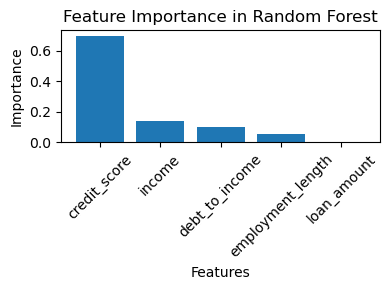

In [13]:
# Visualize feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(4, 3))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Feature Importance in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

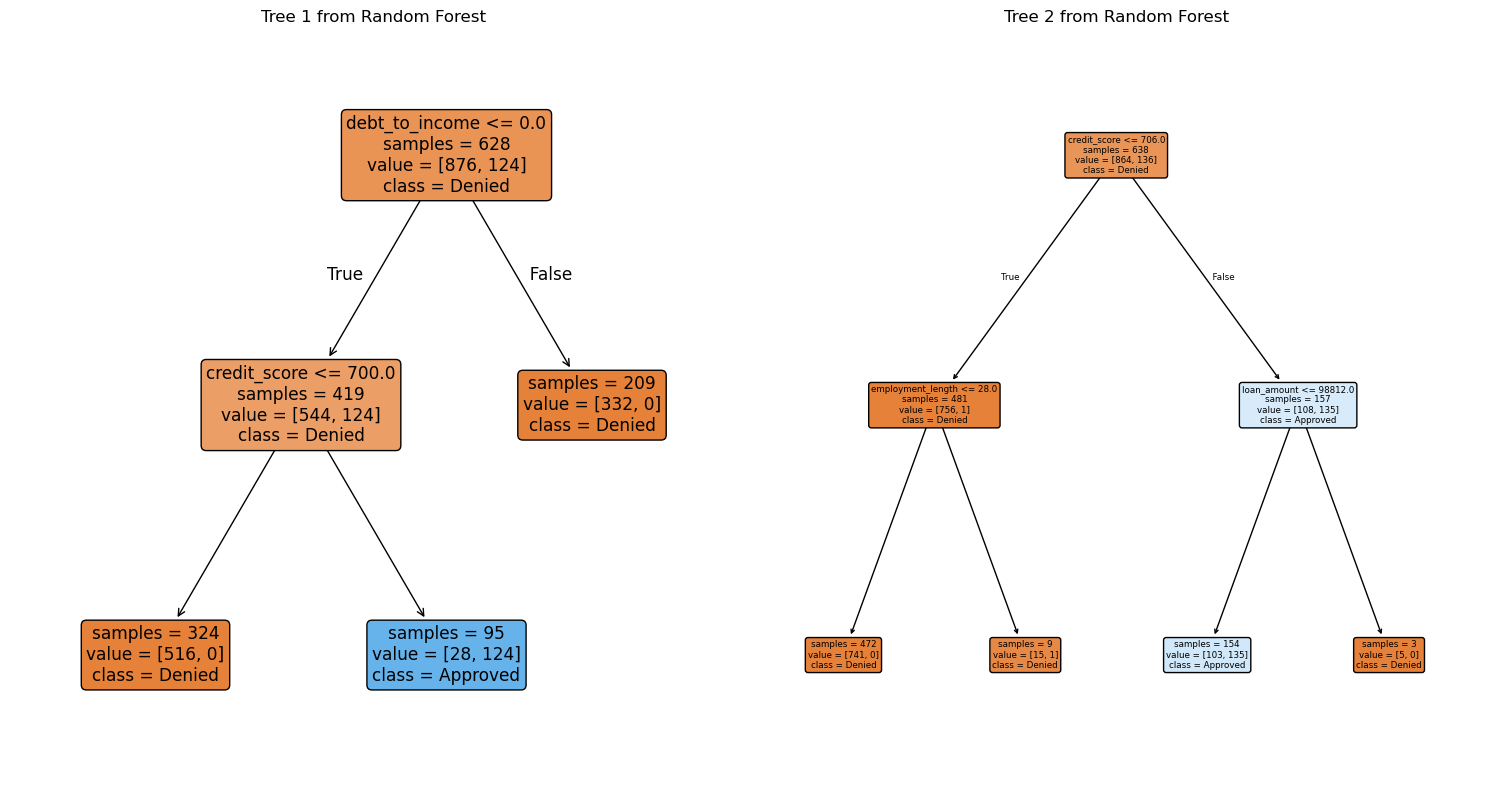

In [14]:
# Plot two trees side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# First tree
plot_tree(rf.estimators_[0], 
          filled=True, 
          feature_names=X.columns.to_list(), 
          class_names=['Denied', 'Approved'], 
          rounded=True,
          impurity=False,
          proportion=False,
          node_ids=False,
          precision=0,
          ax=axes[0])
axes[0].set_title("Tree 1 from Random Forest")

# Second tree
plot_tree(rf.estimators_[1], 
          filled=True, 
          feature_names=X.columns.to_list(), 
          class_names=['Denied', 'Approved'], 
          rounded=True,
          impurity=False,
          proportion=False,
          node_ids=False,
          precision=0,
          ax=axes[1])
axes[1].set_title("Tree 2 from Random Forest")

plt.tight_layout()
plt.show()




#### Support Vector Machines

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or regression tasks. They are based on the idea of finding the hyperplane that best divides a dataset into two classes. The hyperplane is the line that best separates the two classes. The SVM algorithm finds the hyperplane that maximizes the margin between the two classes.

![hyperplanes](img/svm_hp.png)

In cases where the data cannot be linearly separated, SVMs can use a *kernel trick* to transform the data into a higher-dimensional space where it can be separated. This is a very powerful technique that allows SVMs to work well on a wide variety of datasets.

![kernel](img/svm_hd.png)

In [15]:
# First, let's prepare some data.

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # We'll use petal length and width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Now, let's train a Support Vector Machine (SVM) classifier.

# Train SVM classifier
svm_classifier = svm.SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



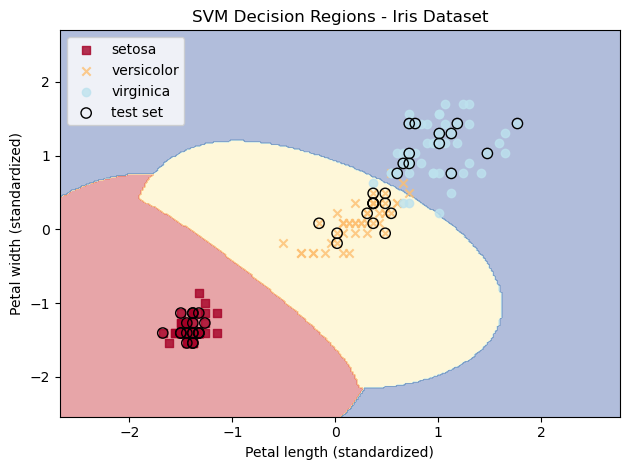

In [17]:
# Now, let's make predictions and evaluate the model.

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the decision boundaries
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx / len(np.unique(y))),
                    marker=markers[idx], label=iris.target_names[cl])

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidth=1, marker='o', 
                    s=55, edgecolors='black', label='test set')

# Visualize the results
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm_classifier, test_idx=range(len(y_train), len(y_combined)))

plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left')
plt.title('SVM Decision Regions - Iris Dataset')
plt.tight_layout()
plt.show()

##### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple, easy-to-understand algorithm that can be used for both classification and regression tasks. It is a non-parametric algorithm, which means that it makes no assumptions about the shape of the data. The basic idea behind KNN is that similar data points are close to each other in the feature space. To make a prediction, KNN looks at the K-nearest neighbors of a data point and takes a majority vote (for classification) or an average (for regression) to make a prediction.

In [18]:
from sklearn import neighbors

# Train KNN classifier on the iris data
k = 5  # number of neighbors
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

KNN (k=5) Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



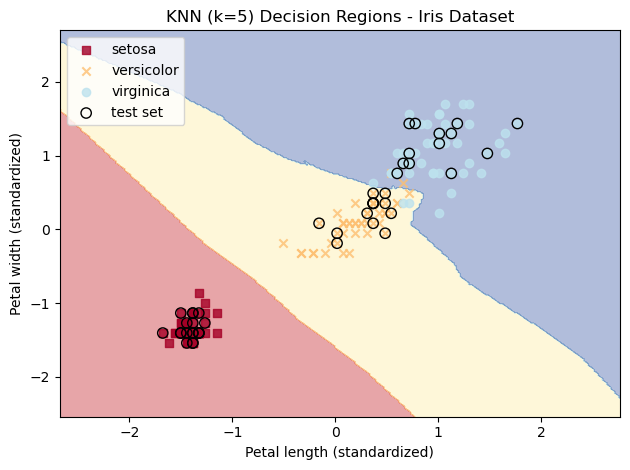

In [19]:
# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Print the accuracy and classification report
print(f"KNN (k={k}) Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the decision boundaries
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx / len(np.unique(y))),
                    marker=markers[idx], label=iris.target_names[cl])

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidth=1, marker='o', 
                    s=55, edgecolors='black', label='test set')

# Visualize the results
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=knn_classifier, test_idx=range(len(y_train), len(y_combined)))

plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend(loc='upper left')
plt.title(f'KNN (k={k}) Decision Regions - Iris Dataset')
plt.tight_layout()
plt.show()